In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [2]:
df = pd.read_excel('data.xls')
df

,Дата\Час,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2024-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,2024-01-02,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,2024-01-03,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,2024-01-04,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,2024-01-05,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,2024-01-06,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,2024-01-07,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,2024-01-08,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,2024-01-09,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Датасет представляет собой объемы трафика, переданного через порт сетевого устройства, записанные с интервалом в 1 час с 12 часов 01.01.2024 г. по 11 часов 09.01.2024 г.

Избавимся от столбца 'Дата\Час', т.к. по сути это есть счетчик 

In [3]:
df = df.drop(columns='Дата\Час')
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,84.601,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,91.789,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,90.817,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,95.227,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,92.149,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,83.413,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,90.488,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,136.804,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [4]:
data = np.array(df).flatten()       # преобразование в плоский массив
data = data[12:200]                # нули в начале и конце временного ряда будут "путать" модель, предложено от них избавиться
data, data.shape

(array([ 83.915,  74.879,  71.569,  83.507,  78.556,  84.909,  90.564,
         88.909,  82.097,  92.617,  82.141,  73.942,  66.159,  60.323,
         59.934,  58.991,  65.926,  68.814,  71.955,  83.094,  91.835,
         84.601,  81.881,  79.911,  88.205,  81.72 ,  81.973,  81.159,
         81.542,  85.174,  86.396,  88.637,  99.631,  85.428,  79.096,
         75.569,  71.343,  63.534,  62.93 ,  60.751,  66.287,  75.827,
         78.634,  83.226,  94.694,  91.789,  90.805,  87.272,  84.488,
         82.505,  93.846,  92.801,  97.032,  99.99 ,  95.81 ,  93.359,
         95.478, 106.44 ,  88.563,  74.33 ,  75.556,  63.9  ,  64.464,
         62.335,  70.257,  78.144,  83.858,  82.886,  89.696,  90.817,
         86.275,  87.51 ,  91.513,  84.024,  83.695,  81.513,  84.233,
         89.34 ,  95.338,  91.403, 102.215, 104.527,  94.472,  79.269,
         71.686,  68.831,  65.909,  62.263,  69.186,  75.471,  82.833,
         84.923,  93.299,  95.227,  93.383,  96.088,  91.   ,  82.422,
      

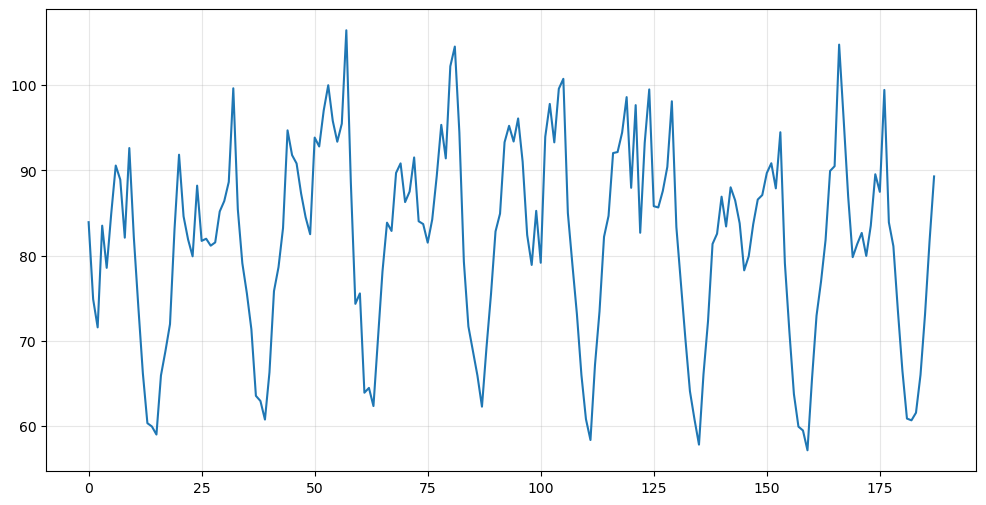

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.grid(alpha=.3);

# 1. Разбиение выборки на обучающие и тестовые подвыборки

In [6]:
train_size = 150
bias = 5

train_data = data[:train_size]
val_data = data[train_size + bias:]

train_data.shape, val_data.shape

((150,), (33,))

In [7]:
hist = 7            # длина истории
future = 10         # горизонт предсказания

# параметры обучения модели
batch_size = 16
epochs = 20

In [8]:
start = hist + future
end = start + train_size

print(start, end)

X_train = train_data
y_train = data[start:end]

x_end = len(val_data) - hist - future
label_start = len(train_data) + bias + hist + future
print(x_end, label_start)

X_val = val_data[:x_end]
y_val = data[label_start:]

17 167
16 172


In [9]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((150,), (150,), (16,), (16,))

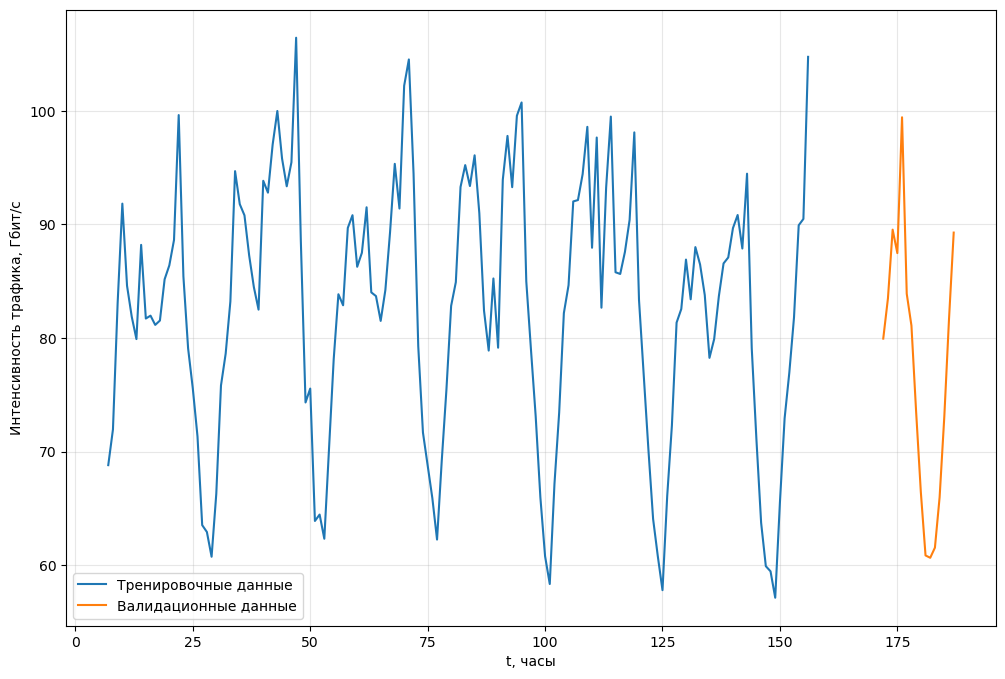

In [10]:
plt.figure(figsize=(12,8))
plt.plot(range(hist, y_train.shape[0] + hist), y_train, label='Тренировочные данные')
plt.plot(range(y_train.shape[0] + hist + bias + future,
               y_train.shape[0] + hist + bias + future + y_val.shape[0]),
               y_val,
               label='Валидационные данные')
plt.grid('on', alpha=.3)
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend(loc='best');

# 2. Формирование `timeseries_dataset`

In [11]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    X_train, y_train,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

dataset_val = timeseries_dataset_from_array(
    X_val, y_val,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

2024-01-19 19:36:42.215620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
for batch in dataset_train:
    inputs, targets = batch
    print('Input shape: ', inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])
    break

Input shape:  (16, 7)
tf.Tensor([74.879 71.569 83.507 78.556 84.909 90.564 88.909], shape=(7,), dtype=float64)
Target shape: (16,)
tf.Tensor(71.955, shape=(), dtype=float64)


# 3. Конструирование и обучение ИНС

## 3.1 LSTM

In [13]:
from keras.layers import LSTM, Conv1D, Dense, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mae', patience=5)

model = Sequential()
model.add(LSTM(64, input_shape = (inputs.shape[1], 1), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Conv1D(64, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='Adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 7, 64)             33024     
                                                                 
 conv1d (Conv1D)             (None, 5, 32)             6176      
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             2112      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 10)                3210      
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [14]:
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[early_stop]
)

Epoch 1/20
9/9 [==============================] - 8s 183ms/step - loss: 82.0889 - mae: 82.0889 - val_loss: 79.2345 - val_mae: 79.2345
Epoch 2/20
9/9 [==============================] - 0s 43ms/step - loss: 79.2525 - mae: 79.2525 - val_loss: 73.5528 - val_mae: 73.5528
Epoch 3/20
9/9 [==============================] - 0s 25ms/step - loss: 68.7296 - mae: 68.7296 - val_loss: 54.6147 - val_mae: 54.6147
Epoch 4/20
9/9 [==============================] - 0s 33ms/step - loss: 38.7720 - mae: 38.7720 - val_loss: 10.6449 - val_mae: 10.6449
Epoch 5/20
9/9 [==============================] - 0s 27ms/step - loss: 14.3591 - mae: 14.3591 - val_loss: 12.4908 - val_mae: 12.4908
Epoch 6/20
9/9 [==============================] - 0s 27ms/step - loss: 11.5743 - mae: 11.5743 - val_loss: 10.8652 - val_mae: 10.8652
Epoch 7/20
9/9 [==============================] - 0s 25ms/step - loss: 10.8535 - mae: 10.8535 - val_loss: 10.5042 - val_mae: 10.5042
Epoch 8/20
9/9 [==============================] - 0s 28ms/step - los

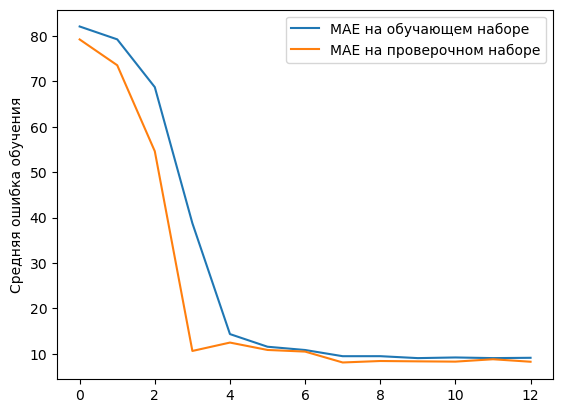

In [15]:
plt.plot(history.history['mae'][:], label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:], label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка обучения')
plt.legend();

Визуализация предсказаний ИНС

In [16]:
pred = model.predict(dataset_train).flatten()
pred_val = model.predict(dataset_val).flatten()

1/1 [==============================] - 0s 102ms/step


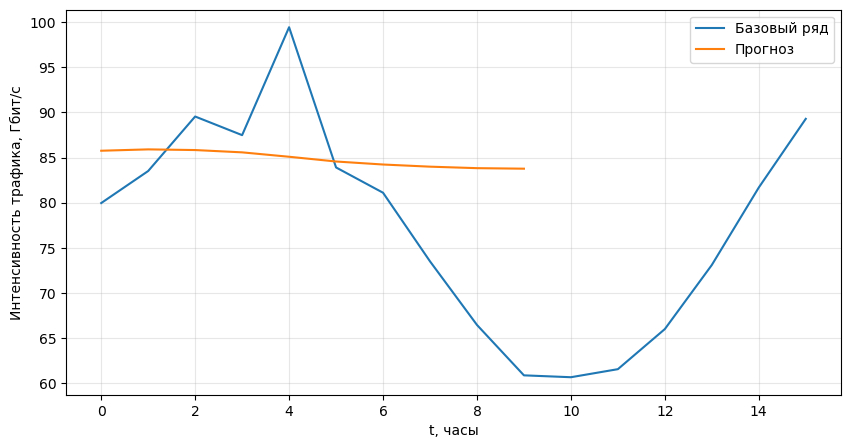

In [17]:
# проверка на валидационных данных

start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_val[start: start + step], label='Базовый ряд')
plt.plot(pred_val[start: start + step], label='Прогноз')
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend();


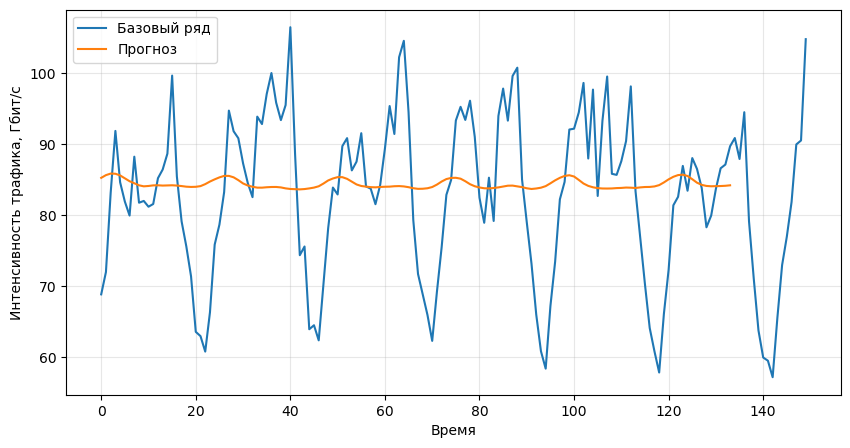

In [18]:
# проверка на обучающих данных

start = 0

plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_train[start: train_size],
         label='Базовый ряд')
plt.plot(pred[future + start: future + train_size],
         label='Прогноз')
plt.xlabel('Время')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend()
plt.show()

## 3.2 GRU

In [19]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()

model_gru.add(GRU(64, input_shape = (inputs.shape[1], 1), return_sequences=True))
model_gru.add(GRU(64, return_sequences=True))
model_gru.add(Conv1D(32, kernel_size=3, activation='relu'))
model_gru.add(Conv1D(64, kernel_size=1, activation='relu'))
model_gru.add(Flatten())
model_gru.add(Dense(10, activation='relu'))
model_gru.add(Dense(1, activation='linear'))

model_gru.compile(loss='mae', optimizer='Adam', metrics=['mae'])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7, 64)             12864     
                                                                 
 gru_1 (GRU)                 (None, 7, 64)             24960     
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 32)             6176      
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 64)             2112      
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3210      
                                                                 
 dense_3 (Dense)             (None, 1)                

In [21]:
history = model_gru.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[early_stop]
)

Epoch 1/20


9/9 [==============================] - 9s 196ms/step - loss: 81.5257 - mae: 81.5257 - val_loss: 78.2340 - val_mae: 78.2340
Epoch 2/20
9/9 [==============================] - 0s 48ms/step - loss: 78.2388 - mae: 78.2388 - val_loss: 72.9852 - val_mae: 72.9852
Epoch 3/20
9/9 [==============================] - 0s 30ms/step - loss: 70.3320 - mae: 70.3320 - val_loss: 60.9856 - val_mae: 60.9856
Epoch 4/20
9/9 [==============================] - 0s 44ms/step - loss: 53.6450 - mae: 53.6450 - val_loss: 37.3880 - val_mae: 37.3880
Epoch 5/20
9/9 [==============================] - 0s 28ms/step - loss: 24.7848 - mae: 24.7848 - val_loss: 8.2504 - val_mae: 8.2504
Epoch 6/20
9/9 [==============================] - 0s 53ms/step - loss: 12.5883 - mae: 12.5883 - val_loss: 12.9365 - val_mae: 12.9365
Epoch 7/20
9/9 [==============================] - 0s 43ms/step - loss: 10.2808 - mae: 10.2808 - val_loss: 9.3629 - val_mae: 9.3629
Epoch 8/20
9/9 [==============================] - 0s 35ms/step - loss: 10.0069 - ma

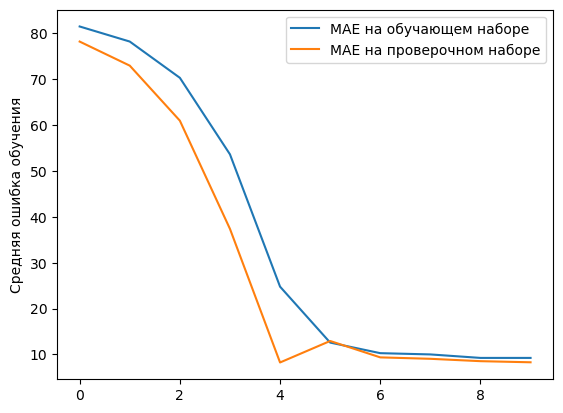

In [22]:
plt.plot(history.history['mae'][:], label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:], label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка обучения')
plt.legend();

Визуализация предсказаний ИНС

In [23]:
pred = model_gru.predict(dataset_train).flatten()
pred_val = model_gru.predict(dataset_val).flatten()

1/1 [==============================] - 0s 87ms/step


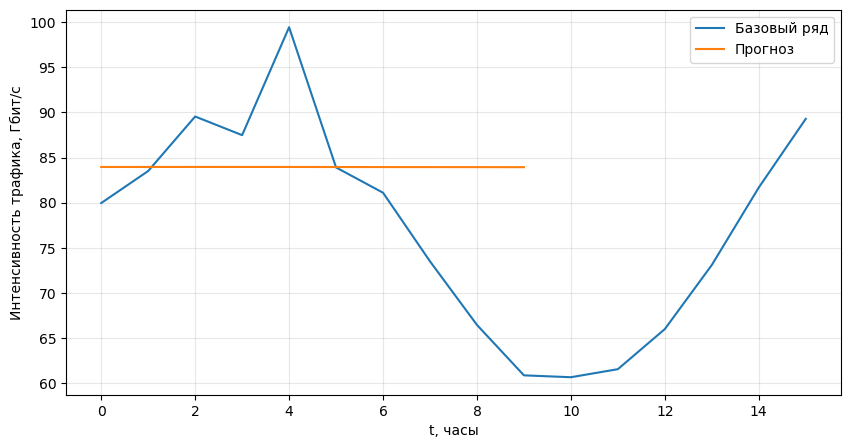

In [24]:
# проверка на валидационных данных

start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_val[start: start + step], label='Базовый ряд')
plt.plot(pred_val[start: start + step], label='Прогноз')
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend();


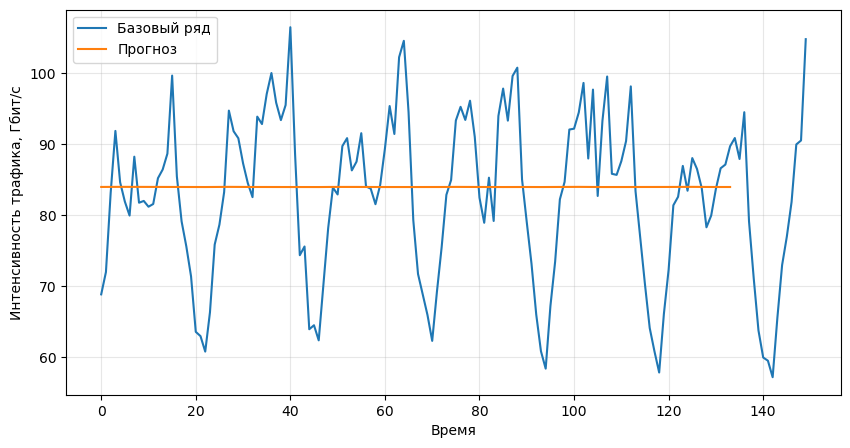

In [25]:
# проверка на обучающих данных

start = 0

plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_train[start: train_size],
         label='Базовый ряд')
plt.plot(pred[future + start: future + train_size],
         label='Прогноз')
plt.xlabel('Время')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend()
plt.show()

## 3.3 RNN

In [30]:
from keras.layers import SimpleRNN

model_rnn = Sequential()

model_rnn.add(SimpleRNN(128, input_shape = (inputs.shape[1], 1), return_sequences=True, activation='sigmoid'))
model_rnn.add(SimpleRNN(128, return_sequences=True, activation='sigmoid'))
model_rnn.add(Conv1D(32, kernel_size=3, activation='relu'))
model_rnn.add(Conv1D(64, kernel_size=1, activation='relu'))
model_rnn.add(Flatten())
model_rnn.add(Dense(10, activation='relu'))
model_rnn.add(Dense(1, activation='linear'))

model_rnn.compile(loss='mae', optimizer='Adam', metrics=['mae'])
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 7, 128)            16640     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 7, 128)            32896     
                                                                 
 conv1d_6 (Conv1D)           (None, 5, 32)             12320     
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 64)             2112      
                                                                 
 flatten_3 (Flatten)         (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                3210      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [31]:
history = model_rnn.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[early_stop]
)

Epoch 1/20
9/9 [==============================] - 3s 77ms/step - loss: 81.7307 - mae: 81.7307 - val_loss: 78.3226 - val_mae: 78.3226
Epoch 2/20
9/9 [==============================] - 0s 26ms/step - loss: 77.7617 - mae: 77.7617 - val_loss: 71.4277 - val_mae: 71.4277
Epoch 3/20
9/9 [==============================] - 0s 20ms/step - loss: 66.9841 - mae: 66.9841 - val_loss: 54.5964 - val_mae: 54.5964
Epoch 4/20
9/9 [==============================] - 0s 28ms/step - loss: 42.7188 - mae: 42.7188 - val_loss: 19.0091 - val_mae: 19.0091
Epoch 5/20
9/9 [==============================] - 0s 22ms/step - loss: 15.7880 - mae: 15.7880 - val_loss: 21.7940 - val_mae: 21.7940
Epoch 6/20
9/9 [==============================] - 0s 24ms/step - loss: 12.7014 - mae: 12.7014 - val_loss: 9.1709 - val_mae: 9.1709
Epoch 7/20
9/9 [==============================] - 0s 25ms/step - loss: 11.1574 - mae: 11.1574 - val_loss: 8.3178 - val_mae: 8.3178
Epoch 8/20
9/9 [==============================] - 0s 22ms/step - loss: 9.

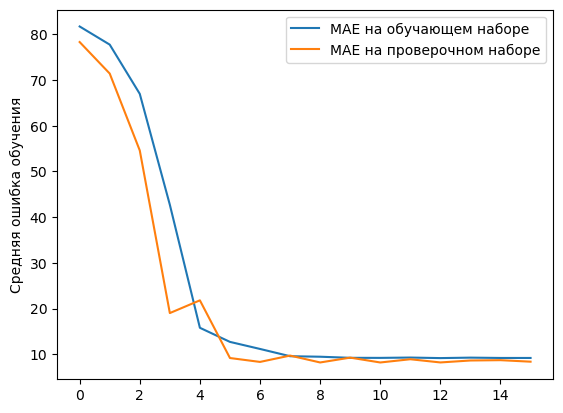

In [32]:
plt.plot(history.history['mae'][:], label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:], label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка обучения')
plt.legend();

Визуализация предсказаний ИНС

In [33]:
pred = model_rnn.predict(dataset_train).flatten()
pred_val = model_rnn.predict(dataset_val).flatten()

1/1 [==============================] - 0s 348ms/step


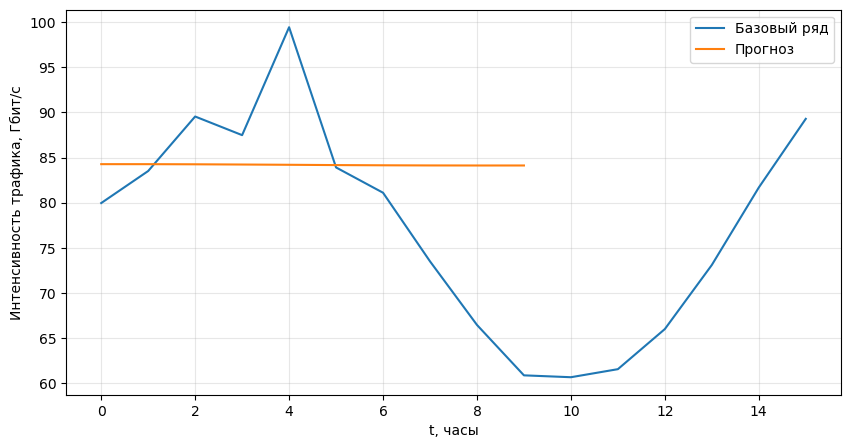

In [34]:
# проверка на валидационных данных

start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_val[start: start + step], label='Базовый ряд')
plt.plot(pred_val[start: start + step], label='Прогноз')
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend();


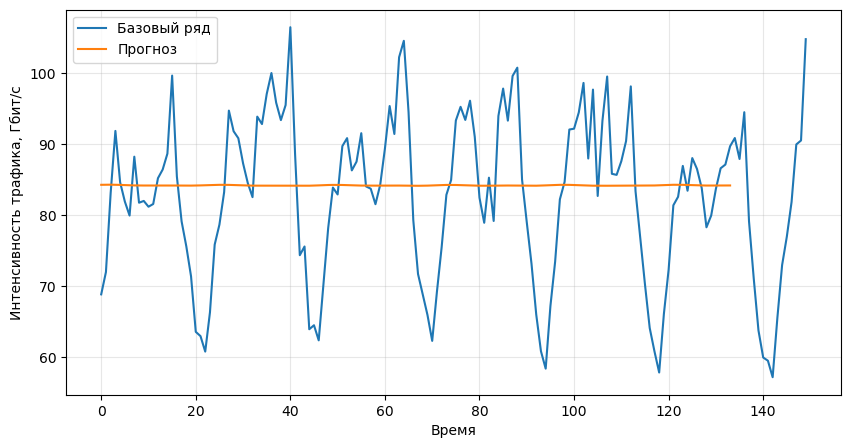

In [35]:
# проверка на обучающих данных

start = 0

plt.figure(figsize=(10, 5))
plt.grid(alpha=.3)
plt.plot(y_train[start: train_size],
         label='Базовый ряд')
plt.plot(pred[future + start: future + train_size],
         label='Прогноз')
plt.xlabel('Время')
plt.ylabel('Интенсивность трафика, Гбит/c')
plt.legend()
plt.show()

# 4. Выводы

Несмотря на то, что ИНС в среднем показала хорошие рехультаты обучения (средняя абсолютная ошибка на валидации составила 8.4292 после 14 эпох обучения), визулазиция предсказаний ИНС показала, что только на обучающих данных она смогла частично обнаружить скрытые зависимости во временном ряду. Это можно связать с тем, что:

- ИНС обучалась только на одном признаке – самом временном ряду, дополнительных признаков в датасете не было;
- объем выборки слишком мал для качественной валидации ИНС.